In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../../../data/train/train.csv')

In [9]:
print(df)

   ID  Age  CreditScore Education RiskLevel
0   1   35          720        16       Low
1   2   28          650        14      High
2   3   45          750   missing       Low
3   4   31          600        12      High
4   5   52          780        18       Low
5   6   29          630        14      High
6   7   42          710        16       Low
7   8   33          640        12      High


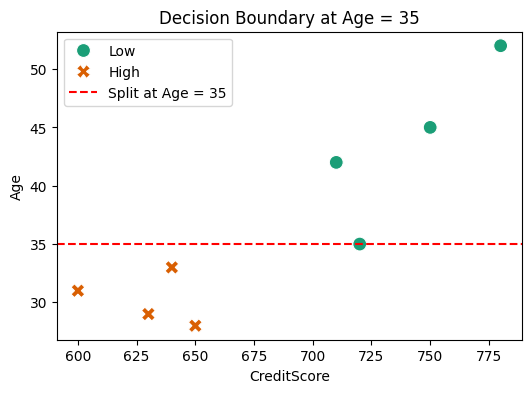

In [10]:
# Split data based on Age = 35
left_subset = df[df["Age"] <= 35]
right_subset = df[df["Age"] > 35]

# Scatter plot showing the decision boundary
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="RiskLevel", style="RiskLevel", s=100, palette="Dark2")
plt.axhline(y=35, color="red", linestyle="--", label="Split at Age = 35")
plt.title("Decision Boundary at Age = 35")
plt.xlabel("CreditScore")
plt.ylabel("Age")
plt.legend()
plt.show()

In [13]:
def compute_variance(subset, target):
    """Computes variance of the target variable in a given subset."""
    if len(subset) == 0:
        return 0  # Avoid division by zero
    return np.var(subset[target], ddof=0)  # Population variance

def compute_variance_reduction(df, feature, threshold, target):
    """Calculates variance reduction for a given split in a regression tree."""
    # Compute total variance before the split
    total_variance = compute_variance(df, target)
    
    # Partition dataset
    left_subset = df[df[feature] < threshold]
    right_subset = df[df[feature] >= threshold]
    
    # Compute variance for each subset
    left_variance = compute_variance(left_subset, target)
    right_variance = compute_variance(right_subset, target)
    
    # Compute weighted variance
    weighted_variance = (len(left_subset) / len(df)) * left_variance + (len(right_subset) / len(df)) * right_variance
    
    # Compute variance reduction
    variance_reduction = total_variance - weighted_variance
    return variance_reduction, left_subset, right_subset

# Compute Variance Reduction for splitting on Age = 35
variance_reduction_value, left_subset, right_subset = compute_variance_reduction(df, "Age", 35, "CreditScore")

# Display results
print(f"Variance Reduction for splitting on Age = 35: {variance_reduction_value:.3f}")

Variance Reduction for splitting on Age = 35: 3025.000


C:\Users\tranq\AppData\Local\Temp\ipykernel_22192\288149572.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=df, order=risk_order, palette="viridis")
C:\Users\tranq\AppData\Local\Temp\ipykernel_22192\288149572.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=left_subset, order=risk_order, palette="coolwarm")
C:\Users\tranq\AppData\Local\Temp\ipykernel_22192\288149572.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=right_subset, order=risk_order, palette="coolwarm")

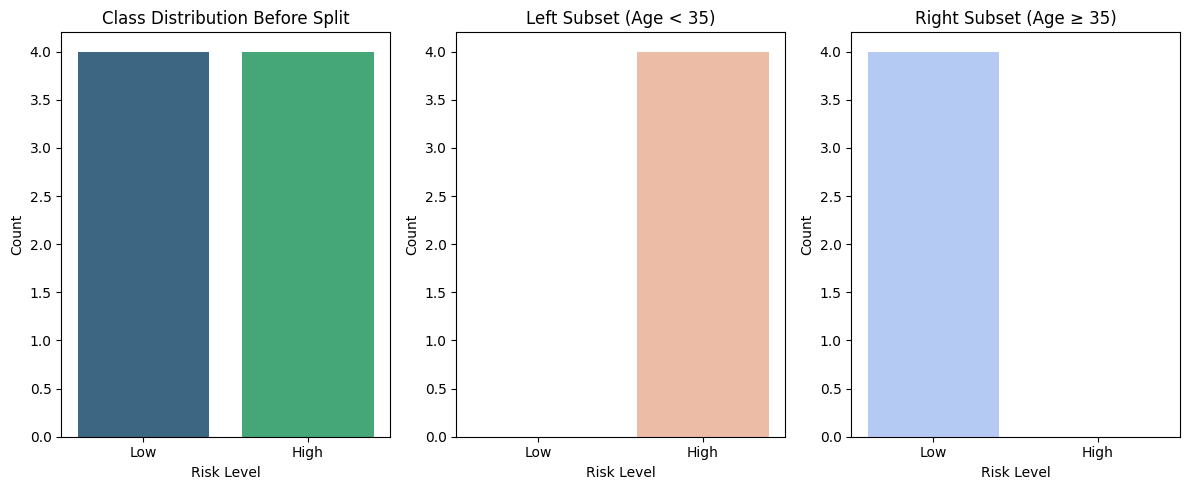

In [14]:
# Define risk level order to ensure both "High" and "Low" appear in each plot
risk_order = ["Low", "High"]

plt.figure(figsize=(12, 5))

# Plot original class distribution before split
plt.subplot(1, 3, 1)
sns.countplot(x="RiskLevel", data=df, order=risk_order, palette="viridis")
plt.title("Class Distribution Before Split")
plt.xlabel("Risk Level")
plt.ylabel("Count")

# Plot left subset (Age < 35)
plt.subplot(1, 3, 2)
sns.countplot(x="RiskLevel", data=left_subset, order=risk_order, palette="coolwarm")
plt.title("Left Subset (Age < 35)")
plt.xlabel("Risk Level")
plt.ylabel("Count")

# Plot right subset (Age ≥ 35)
plt.subplot(1, 3, 3)
sns.countplot(x="RiskLevel", data=right_subset, order=risk_order, palette="coolwarm")
plt.title("Right Subset (Age ≥ 35)")
plt.xlabel("Risk Level")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### CONCLUSION

The computed variance reduction of 3025 when splitting on Age = 35 demonstrates a substantial decrease in numerical dispersion, enhancing the predictive accuracy of the regression decision tree. Unlike information gain in classification trees, which prioritizes class purity, variance reduction focuses on minimizing intra-group variability within continuous target values. This distinction underscores the importance of selecting the appropriate splitting criterion based on the nature of the learning task, ensuring optimal model performance in regression-based decision trees.